In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
x_train = np.linspace(start=-20, stop=20, num=1000)
y_train = 5 * x_train**3 - 10 * x_train**2 - 20 * x_train + 10

In [ ]:
x_train_normalized = ((x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))) * 2 - 1
y_train_normalized = ((y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))) * 2 - 1

In [ ]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x_train_normalized, y_train_normalized, test_size=0.05, random_state=42)
print(x_train_normalized.shape, y_train_normalized.shape)
print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.05, random_state=42)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1000,) (1000,)
(950,) (950,)
(50,) (50,)
(902,) (902,)
(48,) (48,)


In [ ]:
model = Sequential([
    Dense(units=32, input_shape=(1,), activation='sigmoid'),
    Dense(units=64, activation='sigmoid'),
    Dense(units=128, activation='sigmoid'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=1)
loss = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0000e+00 - loss: 0.1999 - val_accuracy: 0.0000e+00 - val_loss: 0.1091
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1516 - val_accuracy: 0.0000e+00 - val_loss: 0.1162
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1532 - val_accuracy: 0.0000e+00 - val_loss: 0.0989
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1388 - val_accuracy: 0.0000e+00 - val_loss: 0.0944
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.1350 - val_accuracy: 0.0000e+00 - val_loss: 0.0835
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.1058 - val_accuracy: 0.0000e+00 - val_loss: 0.0804
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0977 - val_accuracy: 0.0000e+00 - val_loss: 0.0547
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

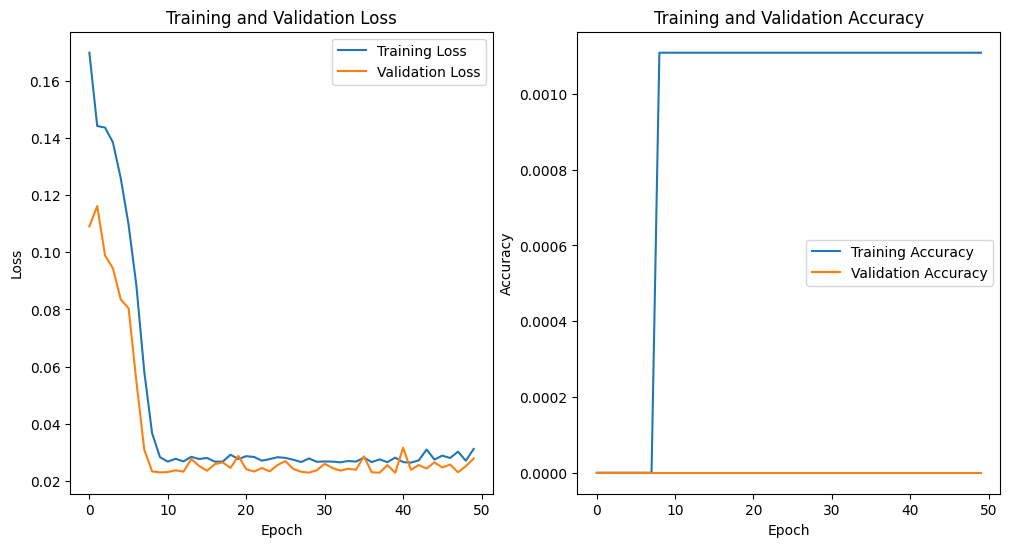

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


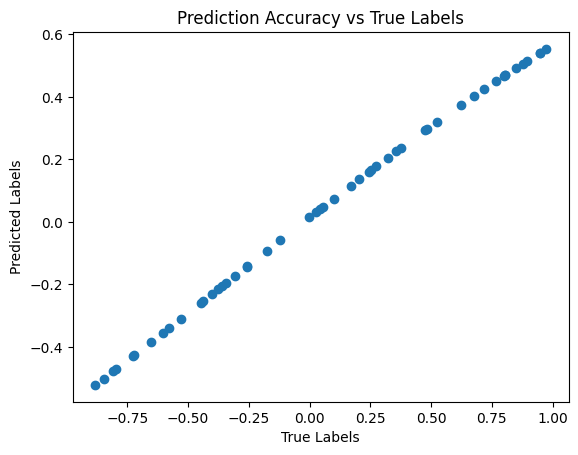

In [ ]:
# print('Loss:', loss)
# print(history.history)
# print(len(history.history['loss']))
# print(len(history.history['val_loss']))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test, y_pred)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Prediction Accuracy vs True Labels')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0695 - mean_absolute_error: 0.1901 - val_loss: 0.0242 - val_mean_absolute_error: 0.1280
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - mean_absolute_error: 0.1108 - val_loss: 0.0110 - val_mean_absolute_error: 0.0767
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mean_absolute_error: 0.0684 - val_loss: 0.0046 - val_mean_absolute_error: 0.0446
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mean_absolute_error: 0.0427 - val_loss: 0.0019 - val_mean_absolute_error: 0.0300
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0315 - val_loss: 0.0013 - val_mean_absolute_error: 0.0245
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mean_absolute_error: 0.0264 - val_loss: 0.0012 - val_mean_absolute_error: 0.0227
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3192e-04 - mean_absolute_error: 0.0182 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,252 (83.02 KB)

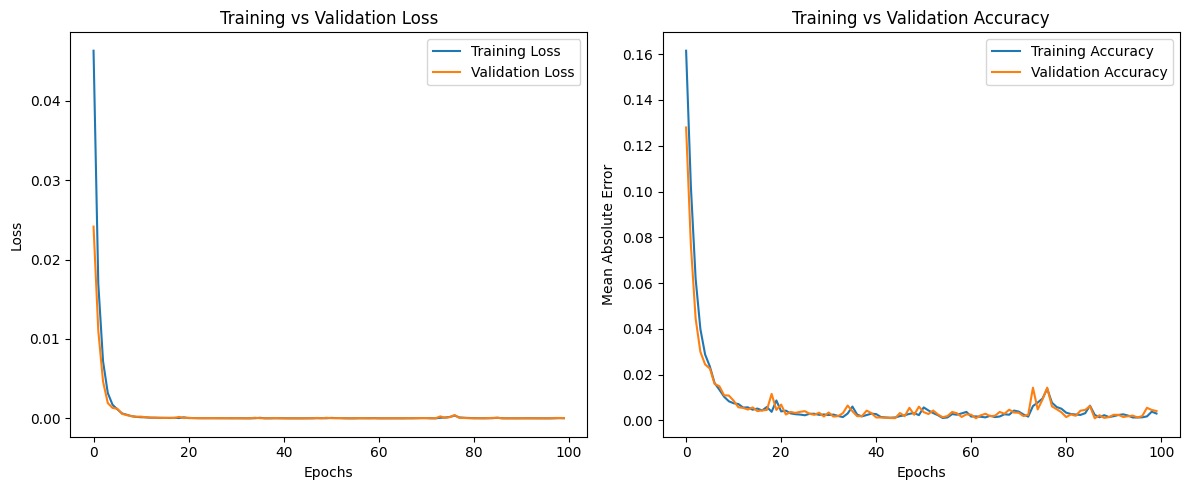

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define the polynomial equation
def polynomial_function(x):
    return 5 * x**3 - 10 * x**2 - 20 * x + 10

# Generate training samples
x_data = np.linspace(-20, 20, 1000)
y_data = polynomial_function(x_data)

# Normalize the data to the range [-1, 1]
x_min, x_max = x_data.min(), x_data.max()
y_min, y_max = y_data.min(), y_data.max()
x_data_normalized = 2 * (x_data - x_min) / (x_max - x_min) - 1
y_data_normalized = 2 * (y_data - y_min) / (y_max - y_min) - 1

# Split the data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_data_normalized, y_data_normalized, test_size=0.1, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Create the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

# Display the model summary
print("\nModel Summary:")
model.summary()

# Plot training vs validation accuracy and loss
plt.figure(figsize=(12, 5))

# Training vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training Accuracy')
plt.plot(history.history['val_mean_absolute_error'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
